# Stock market prediction and forecasting using stacked LSTM

Source : Krish Naik's Youtube video - Data Science projects library

In [2]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas_datareader.data as pdr
import os

In [14]:
df = pdr.get_data_tiingo('AAPL', api_key = 'ce4cfc0f981ed5c868b2f5a1969086e1c83593b6')

In [15]:
df.to_csv('AAPL.csv')

In [16]:
import pandas as pd

In [17]:
df = pd.read_csv('AAPL.csv')

In [25]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-02-23 00:00:00+00:00,136.53,137.480,136.300,137.38,20788186,32.221602,32.445806,32.167321,32.422206,83152744,0.0,1.0
1,AAPL,2017-02-24 00:00:00+00:00,136.66,136.660,135.280,135.91,21776585,32.252283,32.252283,31.926598,32.075280,87106340,0.0,1.0
2,AAPL,2017-02-27 00:00:00+00:00,136.93,137.435,136.280,137.14,20257426,32.316004,32.435186,32.162601,32.365565,81029704,0.0,1.0
3,AAPL,2017-02-28 00:00:00+00:00,136.99,137.435,136.700,137.08,23482860,32.330164,32.435186,32.261723,32.351404,93931440,0.0,1.0
4,AAPL,2017-03-01 00:00:00+00:00,139.79,140.150,137.595,137.89,36414585,32.990975,33.075936,32.472946,32.542568,145658340,0.0,1.0


In [26]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2022-02-14 00:00:00+00:00,168.88,169.5800,166.56,167.37,86185530,168.88,169.5800,166.56,167.37,86185530,0.0,1.0
1254,AAPL,2022-02-15 00:00:00+00:00,172.79,172.9500,170.25,170.97,64286320,172.79,172.9500,170.25,170.97,64286320,0.0,1.0
1255,AAPL,2022-02-16 00:00:00+00:00,172.55,173.3400,170.05,171.85,61177398,172.55,173.3400,170.05,171.85,61177398,0.0,1.0
1256,AAPL,2022-02-17 00:00:00+00:00,168.88,171.9100,168.47,171.03,69589344,168.88,171.9100,168.47,171.03,69589344,0.0,1.0
1257,AAPL,2022-02-18 00:00:00+00:00,167.30,170.5413,166.19,169.82,82772674,167.30,170.5413,166.19,169.82,82772674,0.0,1.0


In [19]:
df1=df.reset_index()['close']

In [20]:
df1

0       136.53
1       136.66
2       136.93
3       136.99
4       139.79
         ...  
1253    168.88
1254    172.79
1255    172.55
1256    168.88
1257    167.30
Name: close, Length: 1258, dtype: float64

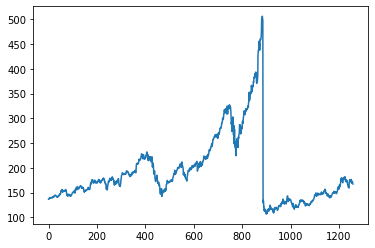

In [22]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
## LSTM is very sensitive to scaling

In [27]:
import numpy as np

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [29]:
df1.shape

(1258, 1)

In [30]:
##Splitting the dataset into train and test

training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [33]:
import numpy
# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]  ###i = 0,0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

In [34]:
# reshape into X=t, t+1, t+2, t+3 and Y=t+4

time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [35]:
print(X_train)

[[0.07436443 0.07469004 0.07536631 ... 0.10251722 0.10569818 0.10700063]
 [0.07469004 0.07536631 0.07551659 ... 0.10569818 0.10700063 0.10830307]
 [0.07536631 0.07551659 0.08252974 ... 0.10700063 0.10830307 0.11065748]
 ...
 [0.443732   0.44440827 0.45853475 ... 0.50296807 0.50770194 0.50311835]
 [0.44440827 0.45853475 0.45825924 ... 0.50770194 0.50311835 0.5212774 ]
 [0.45853475 0.45825924 0.46256731 ... 0.50311835 0.5212774  0.51671885]]


In [37]:
print(X_train.shape), print(Y_train.shape)

(716, 100)
(716,)


(None, None)

In [36]:
print(X_test.shape),print(Y_test.shape)

(340, 100)
(340,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [38]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [39]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 11s 323ms/step - loss: 0.0153 - val_loss: 0.0014
Epoch 2/100
12/12 [==============================] - 2s 169ms/step - loss: 0.0047 - val_loss: 0.0057
Epoch 3/100
12/12 [==============================] - 2s 176ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 4/100
12/12 [==============================] - 2s 180ms/step - loss: 0.0013 - val_loss: 2.7649e-04
Epoch 5/100
12/12 [==============================] - 2s 145ms/step - loss: 0.0012 - val_loss: 2.5105e-04
Epoch 6/100
12/12 [==============================] - 2s 171ms/step - loss: 0.0010 - val_loss: 2.4905e-04
Epoch 7/100
12/12 [==============================] - 2s 179ms/step - loss: 9.8780e-04 - val_loss: 3.9906e-04
Epoch 8/100
12/12 [==============================] - 2s 175ms/step - loss: 9.1603e-04 - val_loss: 3.2997e-04
Epoch 9/100
12/12 [==============================] - 2s 182ms/step - loss: 8.6880e-04 - val_loss: 2.2727e-04
Epoch 10/100
12/12 [==============================] - 

In [42]:
import tensorflow as tf

In [43]:
tf.__version__

'2.8.0'

In [44]:
### Lets do the prediction and check performance metrics

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [50]:
## Transform back to original form

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [51]:
### Calculate RMSE performace metrics

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

210.29747411632871

In [52]:
### Test data RMSE

math.sqrt(mean_squared_error(Y_test, test_predict))

144.7076085190451

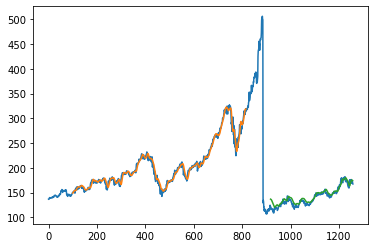

In [53]:
### Plotting
# shift train prediction for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict

# plot baseline and pedictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [54]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [55]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist() 

In [59]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):  
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1,n_steps,1))
        #print(x_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.16508693]
101
101
1 day input [0.08681277 0.08969317 0.08090169 0.08583594 0.08806512 0.09129618
 0.09031935 0.09009393 0.08683782 0.085335   0.09247339 0.09517846
 0.09946149 0.10499687 0.10624922 0.10680025 0.10482154 0.10469631
 0.1063995  0.10522229 0.11453976 0.10760175 0.10549781 0.10815279
 0.11183469 0.1105072  0.1113087  0.10920476 0.1101315  0.10289292
 0.10276769 0.10807765 0.10810269 0.11060739 0.11684408 0.12781465
 0.13452724 0.13570445 0.13668128 0.13800877 0.12515967 0.13375078
 0.14642455 0.14509706 0.14256731 0.1377583  0.14647464 0.16115216
 0.17092048 0.16961803 0.181866   0.17257358 0.16904195 0.18149029
 0.16385723 0.16105197 0.15757044 0.16568566 0.17232311 0.17392611
 0.18407013 0.18146525 0.18169067 0.17873513 0.17715717 0.18827802
 0.18249217 0.17051972 0.16320601 0.16363181 0.1636819  0.17092048
 0.17204759 0.1636819  0.16588604 0.15769568 0.14875391 0.14444584
 0.13918597 0.13720726 0.13259862 0.1323732  0.13119599 0.15902317
 0.17016907 0.16974327 0.1728

In [60]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [61]:
import matplotlib.pyplot as plt

In [62]:
len(df1)

1258

In [64]:
df3=df1.tolist()
df3.extend(lst_output)

In [70]:
plt.plot(day_new,scaler.inverse_transform(df1[11158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

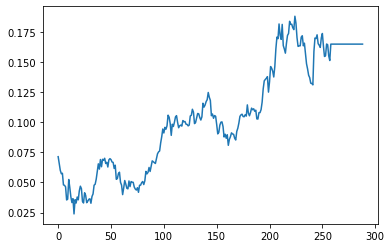

In [68]:
df3=df1.tolist()
df3.extend(lst_output)

plt.plot(df3[1000:])